<a href="https://colab.research.google.com/github/Soares-remootFR/correlacao_linear-Fabio-Soares-.ipynb/blob/main/correlacao_linear(Fabio_Soares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Correlação linear**

###Modelo capaz de prever o percentual de alunos que serão aprovados
###em 2017 usando uma base de dados com informações de 2015 e 2016.
  


*   Tratamento de dados aprendido;
*   Regressão linear;
*   Resíduo.



   







In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
alunos = pd.read_excel("/content/C+¦pia de aprovacao_alunos (1).xlsx")
alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


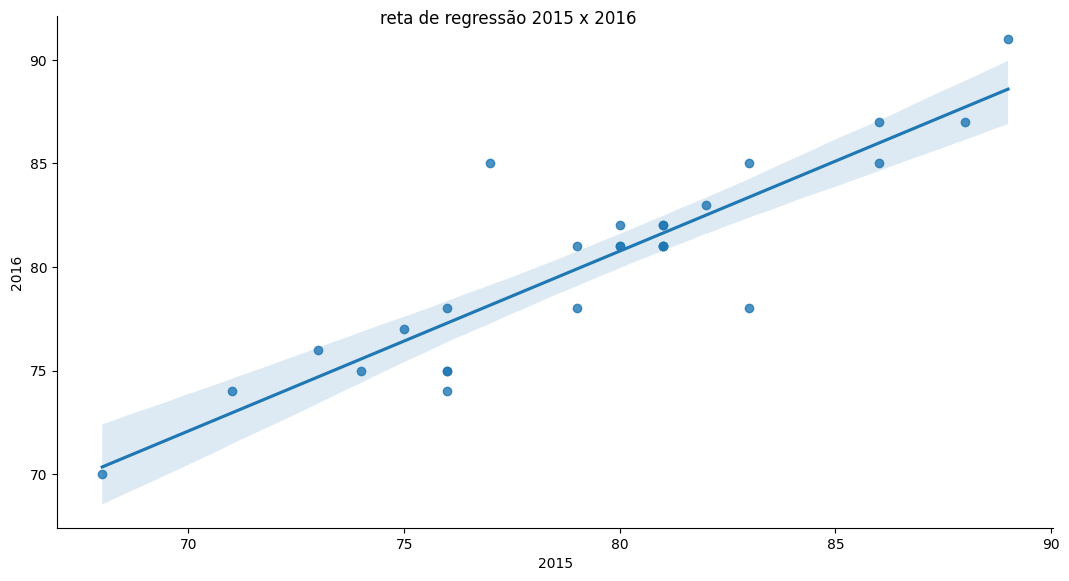

In [18]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=alunos)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("reta de regressão 2015 x 2016")
ax.set_xlabels("2015")
ax.set_ylabels("2016")
ax;

In [19]:
alunos.corr()


<ipython-input-19-8d6a2a5b8151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alunos.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [20]:
import statsmodels.api as sm
y = alunos.ano_2016
x = sm.add_constant(alunos.ano_2015)

In [21]:
resultado_regressao = sm.OLS(y,x).fit()

In [22]:
# modelo prevendo com eficácia de 80%
# intercepto (ponto inicial) de 11
# fator multiplicador de 2015 é 0.8  (A cada aumento da variável resposta é mult. x * 0.86)
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.02e-10
Time:                        02:24:04   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [23]:
alunos["y_previsto"] = resultado_regressao.predict()
alunos.head()


,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [24]:
alunos["residuo"] = alunos["y_previsto"] - alunos["ano_2016"]
alunos.head()

,UF,ano_2015,ano_2016,y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
